# PROYECTO DE PRUEBA A/B “recommender_system_test”

## Paso 1: Objetivos del estudio.
determinar si el nuevo sistema de recomendaciones mejora la conversión en el embudo

### Métrica primaria: 

Tasa de conversión en cada paso del embudo.

### Métricas de apoyo

Embudo: tasas entre etapas clave (p. ej., visita → carrito → compra).

Actividad: número de eventos por usuario y su distribución entre grupos.

Temporalidad: distribución diaria de eventos para detectar picos/caídas.

### Hipótesis:

H0: no hay diferencias en las tasas de conversión entre grupos A y B.

H1: hay diferencias; se espera un ≥10% de aumento en grupo B.

### Nivel de significancia: 
α = 0.05.

## Importación de librerías

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

## Paso 2: Exploración de datos

### 2.1 Carga de datos

In [41]:
marketing=pd.read_csv(r"C:\Users\yesse\OneDrive\Documentos\PROYECTOS ANALISIS DE DATOS\PRUEBA A-B TIENDA EN LINEA\Data\ab_project_marketing_events_us.csv")
usuarios=pd.read_csv(r"C:\Users\yesse\OneDrive\Documentos\PROYECTOS ANALISIS DE DATOS\PRUEBA A-B TIENDA EN LINEA\Data\final_ab_new_users_upd_us.csv")
eventos=pd.read_csv(r"C:\Users\yesse\OneDrive\Documentos\PROYECTOS ANALISIS DE DATOS\PRUEBA A-B TIENDA EN LINEA\Data\final_ab_events_upd_us.csv")
participantes=pd.read_csv(r"C:\Users\yesse\OneDrive\Documentos\PROYECTOS ANALISIS DE DATOS\PRUEBA A-B TIENDA EN LINEA\Data\final_ab_participants_upd_us.csv")

### 2.2 Limpieza de datos

#### Marketing

In [42]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


In [43]:
# Cambio de tipo de datos de start_dt y finish_dt  

marketing["start_dt"]  = pd.to_datetime(marketing["start_dt"], errors="coerce")
marketing["finish_dt"] = pd.to_datetime(marketing["finish_dt"], errors="coerce")

In [44]:
# Estandarizar letras
for c in ["name","regions"]:
    if c in marketing.columns:
        marketing[c] = marketing[c].str.strip().str.lower()

In [45]:
# Valores ausentes
marketing.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [46]:
# Valores duplicados
marketing.duplicated().sum()

np.int64(0)

In [47]:
# Valores Nulos
marketing.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

#### Usuarios

In [48]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [49]:
usuarios.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [50]:
# Convetir las columnas de fechas al formato correcto

usuarios["first_date"]  = pd.to_datetime(usuarios["first_date"], errors="coerce")

In [51]:
# normalización de letras y tipo de datos
usuarios["user_id"] = usuarios["user_id"].str.strip()
for c in ["region", "device"]:
    if c in usuarios.columns:
        usuarios[c] = usuarios[c].str.strip().str.lower()

In [52]:
# Valores ausentes
usuarios.isna().sum()


user_id       0
first_date    0
region        0
device        0
dtype: int64

In [53]:
# Valores duplicados
usuarios.duplicated().sum()

np.int64(0)

In [54]:
# Valores nulos
usuarios.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

#### Eventos

In [55]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [56]:
eventos.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [57]:
# Cambio de dytipe 
eventos["event_dt"]  = pd.to_datetime(eventos["event_dt"], errors="coerce")


In [58]:
# Valores ausentes
eventos.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [59]:
# Valores duplicados
eventos.duplicated().sum()

np.int64(0)

In [60]:
# Valores nulos
eventos.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

#### Paticipantes

In [61]:
participantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [62]:
participantes.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [63]:
# Valores ausentes
participantes.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [64]:
# Valores nulos
participantes.isnull().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [65]:
# Valores duplicados
participantes.duplicated().sum()

np.int64(0)

### 2.3 Filtrado de region EU

In [66]:
# Distribucion de regiones registradas
usuarios['region'].value_counts(dropna=False)


region
eu           43396
n.america     9051
cis           3130
apac          3126
Name: count, dtype: int64

In [67]:
# Uno participantes con la región correspondiente desde 'usuarios'
p_con_region = participantes.merge(
    usuarios[['user_id', 'region']],
    on='user_id',
    how='left'
)

# Filtro los que no son de EU 
no_eu = p_con_region[p_con_region['region'] != 'eu']

no_eu['region'].value_counts(dropna=False)


region
n.america    119
apac          45
cis           30
Name: count, dtype: int64

In [68]:
# Filtramos participantes de la región EU
participantes_eu = p_con_region[p_con_region['region'] == 'eu'].copy()

participantes_eu['group'].value_counts()


group
A    8071
B    6260
Name: count, dtype: int64

#### Conclusión:
La preparación de los datos confirmó que la gran mayoría de participantes pertenecen a la región EU, aunque se identificaron y excluyeron 194 usuarios fuera de alcance. Tras el filtrado, contamos con 14.3K usuarios válidos distribuidos en los grupos de control y test, una muestra suficientemente robusta para continuar con la validación del experimento.

## Paso 3: Análisis exploratorio de datos

### 3.1 Validación rango de fechas

In [69]:
# Fechas oficiales del experimento
start_date = pd.Timestamp('2020-12-07')
end_date   = pd.Timestamp('2020-12-21')

# Unimos participantes con su fecha de registro
p_fechas = participantes_eu.merge(
    usuarios[['user_id','first_date']], 
    on='user_id', 
    how='left'
)

# Reviso fechas mínimo y máximo
p_fechas['first_date'].min(), p_fechas['first_date'].max()


(Timestamp('2020-12-07 00:00:00'), Timestamp('2020-12-23 00:00:00'))

* Interpretación

Esto significa que algunos usuarios fueron admitidos en la prueba después de la fecha de corte oficial.
En concreto: se colaron registros del 22 y 23 de diciembre.

Esto no invalida el test, pero sí rompe la regla del diseño original, que era aceptar solo hasta el 21.

In [70]:
# Cuantos usuarios se registraron fuera del rango
fuera_rango = p_fechas[
    (p_fechas['first_date'] < start_date) | 
    (p_fechas['first_date'] > end_date)
]

fuera_rango['first_date'].value_counts().sort_index()


first_date
2020-12-22    587
2020-12-23    415
Name: count, dtype: int64

In [71]:
# Usuarios registrados dentro de la ventana oficial
participantes_eu_validos = p_fechas[
    (p_fechas['first_date'] >= start_date) &
    (p_fechas['first_date'] <= end_date)
].copy()

participantes_eu_validos['group'].value_counts()


group
A    7582
B    5747
Name: count, dtype: int64

#### Conclusión

La gran mayoría de los participantes fueron reclutados correctamente entre el 7 y el 21 de diciembre.

Sin embargo, se identificaron 1 002 usuarios (22–23 dic) que se colaron fuera de la ventana de reclutamiento.

Estos usuarios fueron excluidos del análisis, dejando una muestra final de 13 329 participantes válidos (7 582 en A y 5 747 en B).

### 3.2 Conversión en las diferentes etapas del embudo 

In [72]:
# Filtramos solo eventos de usuarios válidos 
eventos_validos = eventos.merge(
    participantes_eu_validos[['user_id','group']],
    on='user_id',
    how='inner'
)

# Conteo de usuarios únicos por grupo y evento
embudo = (
    eventos_validos[eventos_validos['event_name'].isin(['product_page','product_cart','purchase'])]
    .groupby(['group','event_name'])['user_id']
    .nunique()
    .unstack(fill_value=0)
)

# Reordenar columnas del embudo en el orden lógico
orden = ['product_page', 'product_cart', 'purchase']
embudo = embudo.reindex(columns=orden)

embudo = embudo.reindex(['A','B'])

embudo


event_name,product_page,product_cart,purchase
group,,,
A,4778,2291,2473
B,3616,1856,1827


In [73]:
totales_por_grupo = participantes_eu_validos.groupby('group')['user_id'].nunique()

embudo_pct = embudo.div(totales_por_grupo, axis=0) * 100

embudo_pct = embudo_pct.round(2)

embudo_pct


event_name,product_page,product_cart,purchase
group,,,
A,65.98,31.63,34.15
B,64.10,32.90,32.39


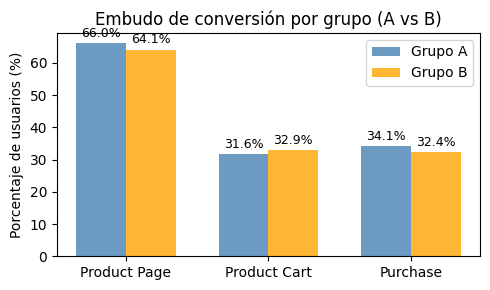

In [74]:
etapas = ['product_page', 'product_cart', 'purchase']
x = np.arange(len(etapas))  # posiciones en el eje X
ancho = 0.35                 # ancho de cada barra

fig, ax = plt.subplots(figsize=(5, 3))

valores_A = embudo_pct.loc['A', etapas]
valores_B = embudo_pct.loc['B', etapas]

bars_A = ax.bar(x - ancho/2, valores_A, width=ancho, label='Grupo A', color='steelblue', alpha=0.8)
bars_B = ax.bar(x + ancho/2, valores_B, width=ancho, label='Grupo B', color='orange', alpha=0.8)

for bar in bars_A + bars_B:
    altura = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, altura + 1, f'{altura:.1f}%', 
            ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Porcentaje de usuarios (%)')
ax.set_title('Embudo de conversión por grupo (A vs B)')
ax.set_xticks(x)
ax.set_xticklabels(['Product Page', 'Product Cart', 'Purchase'])
ax.legend()

plt.tight_layout()
plt.show()


#### Conclusión – Embudo de conversión

El embudo muestra un patrón esperado en la primera etapa: la mayoría de usuarios visita al menos una página de producto.  
Sin embargo, observamos un comportamiento particular:

- En ambos grupos hay más compras (purchase) que eventos de añadir al carrito (product_cart).  
- Esto indica que muchos usuarios realizan compras directas sin que se registre un product_cart previo.  

Existen varias explicaciones plausibles:  
1. Algunos usuarios utilizan un flujo de “compra rápida” que no pasa explícitamente por el carrito.  
2. El sistema de tracking puede no registrar todos los clics en “añadir al carrito”, pero sí registrar la compra.  
3. Es posible que existan otros embudos alternativos (listas de deseos, compras desde recomendaciones, etc.) que terminan en purchase sin product_cart.

En conclusión, el embudo clásico page → cart → purchase no se cumple de forma estricta en estos datos.  
Esto no es un error de análisis, sino una peculiaridad del sistema de eventos, y debe ser comunicado claramente a directivos para que entiendan que los usuarios tienen más de un camino hacia la compra.


### 3.3 ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

In [79]:
# Contamos eventos totales por usuario
eventos_validos_final = eventos.merge(
    participantes_final[['user_id','group']],
    on='user_id',
    how='inner'
)

# Número de eventos por usuario
eventos_por_usuario = (
    eventos_validos_final.groupby(['user_id','group'])['event_name']
    .count()
    .reset_index(name='eventos_count')
)

eventos_por_usuario.groupby('group')['eventos_count'].describe()


,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,6801.0,7.694751,4.585340,1.0,4.0,6.0,10.0,40.0
B,5200.0,7.381346,4.343467,1.0,4.0,6.0,9.0,36.0


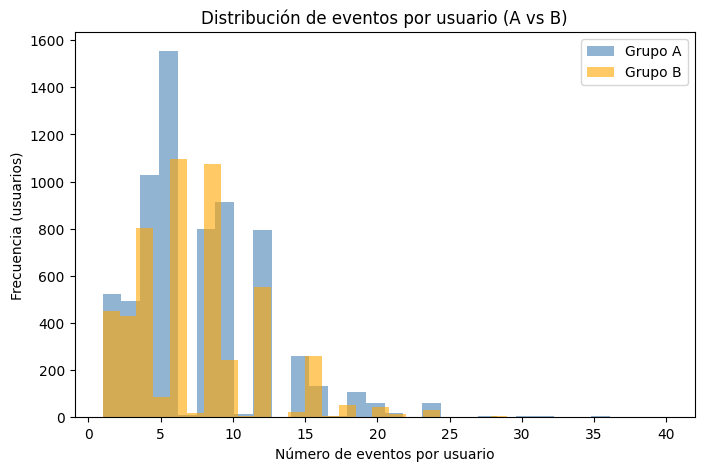

In [80]:
fig, ax = plt.subplots(figsize=(8,5))

# Histograma grupo A
ax.hist(
    eventos_por_usuario.loc[eventos_por_usuario['group']=='A','eventos_count'],
    bins=30, alpha=0.6, label='Grupo A', color='steelblue'
)

# Histograma grupo B
ax.hist(
    eventos_por_usuario.loc[eventos_por_usuario['group']=='B','eventos_count'],
    bins=30, alpha=0.6, label='Grupo B', color='orange'
)

# Ajustes estéticos
ax.set_title('Distribución de eventos por usuario (A vs B)')
ax.set_xlabel('Número de eventos por usuario')
ax.set_ylabel('Frecuencia (usuarios)')
ax.legend()

plt.show()


#### Conclusión eventos por usuario

La distribución del número de eventos por usuario es consistente entre los grupos A y B.
Ambos presentan un promedio de alrededor de 7 eventos y una mediana de 6, lo que confirma que la actividad está equilibrada entre muestras.

### 3.4 ¿Hay usuarios que están presentes en ambas muestras?

In [81]:
# Revisamos cuántos grupos distintos tiene cada user_id
cruces = participantes_eu_validos.groupby('user_id')['group'].nunique()

# Filtramos los que están en más de un grupo
en_ambos = cruces[cruces > 1].index

len(en_ambos)


441

In [82]:
# Excluir usuarios que aparecen en ambos grupos
participantes_final = participantes_eu_validos[~participantes_eu_validos['user_id'].isin(en_ambos)].copy()

# Conteo final por grupo
participantes_final['group'].value_counts()


group
A    7141
B    5306
Name: count, dtype: int64

#### Conclusión – Validación de asignación a grupos

Se detectaron 441 usuarios presentes en ambos grupos, lo que violaba el diseño del experimento.

Estos usuarios fueron excluidos.

La muestra final se reduce a 12.447 participantes válidos.

Ahora sí tenemos una base confiable para analizar el embudo y las conversiones.

### 3.5 ¿Cómo se distribuye el número de eventos entre los días?

In [83]:
# Se crea una columna con solo la fecha
eventos_validos_final['event_date'] = eventos_validos_final['event_dt'].dt.date

# Se cuentan los eventos diarios por grupo
eventos_por_dia = (
    eventos_validos_final.groupby(['event_date','group'])['event_name']
    .count()
    .reset_index(name='n_eventos')
)

# Pivot para comparar A vs B lado a lado
eventos_por_dia_pivot = eventos_por_dia.pivot(index='event_date', columns='group', values='n_eventos').fillna(0)

eventos_por_dia_pivot.head()


group,A,B
event_date,,
2020-12-07,1260,1278
2020-12-08,1397,1329
2020-12-09,1464,1420
2020-12-10,1546,1439
2020-12-11,1585,1397


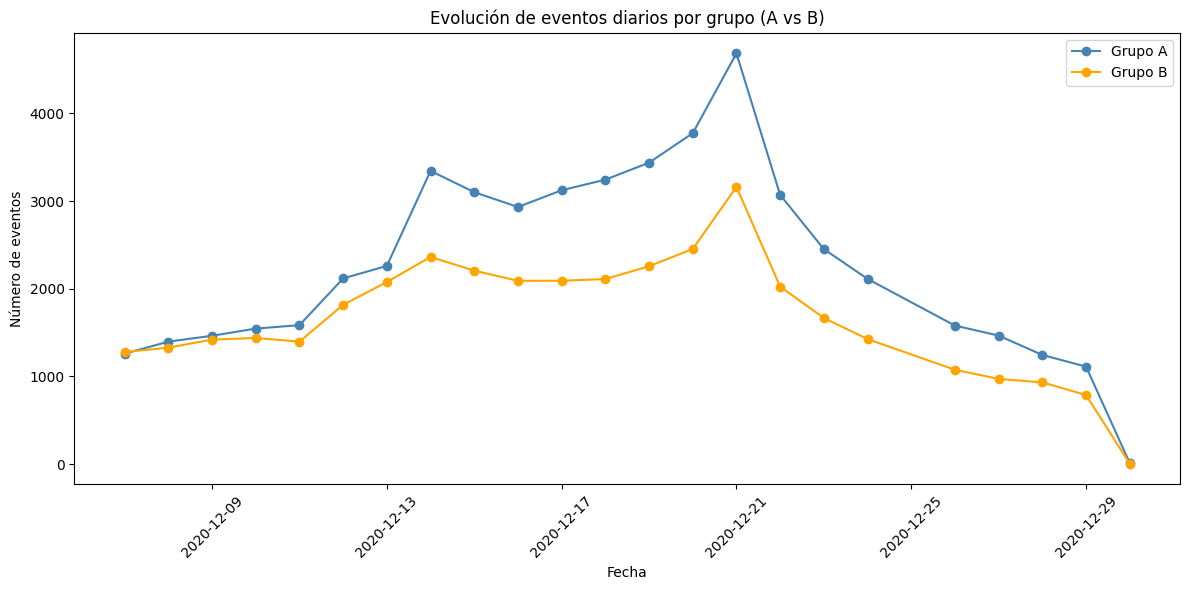

In [84]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(eventos_por_dia_pivot.index, eventos_por_dia_pivot['A'], 
        label='Grupo A', color='steelblue', marker='o')
ax.plot(eventos_por_dia_pivot.index, eventos_por_dia_pivot['B'], 
        label='Grupo B', color='orange', marker='o')

ax.set_title('Evolución de eventos diarios por grupo (A vs B)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Número de eventos')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Conclusión distribución de eventos por día

La distribución de eventos en el tiempo es coherente y no muestra anomalías relevantes.
Ambos grupos siguen patrones paralelos, con un aumento natural hacia el 21 de diciembre (fin de reclutamiento).
Esto indica que no hubo fallos técnicos ni sesgos graves en la recolección de datos durante el test.

### Conclusión 

El análisis exploratorio de datos nos permitió identificar que:

- **Embudo de conversión:** la secuencia esperada product_page → product_cart → purchase no se cumple de manera estricta. En ambos grupos hay más usuarios con purchase que con product_cart, lo que indica que muchos realizan compras directas sin pasar por el carrito o que existen limitaciones en el tracking de eventos intermedios.
  
- **Actividad por usuario:** la distribución de eventos por usuario es muy similar en A y B, con una mediana de 6 eventos y promedios cercanos (~7.7 en A vs ~7.4 en B). Esto confirma que la intensidad de uso de la aplicación está equilibrada entre grupos.  
- **Integridad de los datos:** se identificaron y excluyeron dos tipos de anomalías antes del análisis estadístico:  
   
La exploración confirma que los datos son consistentes y que las diferencias iniciales (usuarios fuera de rango, duplicados y embudo no clásico) fueron corregidas o documentadas.  
La muestra final es sólida y está lista para pasar a la etapa de pruebas estadísticas con confianza.


## Paso 4. Evaluar los resultados de la prueba A/B

### 4.1 Prueba Z

In [85]:
# Tasas de conversión para cada grupo
# Participantes finales por grupo
totales = participantes_final.groupby('group')['user_id'].nunique()

# Usuarios únicos por evento y grupo
usuarios_por_evento = (
    eventos_validos_final[eventos_validos_final['event_name'].isin(['product_page','product_cart','purchase'])]
    .groupby(['group','event_name'])['user_id']
    .nunique()
    .unstack(fill_value=0)
)

usuarios_por_evento = usuarios_por_evento[['product_page','product_cart','purchase']]

# Se calcula tasas de conversión 
conversiones = usuarios_por_evento.div(totales, axis=0).round(4) * 100

usuarios_por_evento, conversiones


(event_name  product_page  product_cart  purchase
 group                                           
 A                   4507          2165      2346
 B                   3345          1730      1700,
 event_name  product_page  product_cart  purchase
 group                                           
 A                  66.27         31.83     34.49
 B                  64.33         33.27     32.69)

In [86]:
def prueba_z_conversion(success_a, total_a, success_b, total_b, etapa):
    """
    Aplica prueba z de dos proporciones entre grupo A y B.
    
    success_a = usuarios con el evento en A
    total_a   = total de usuarios en A
    success_b = usuarios con el evento en B
    total_b   = total de usuarios en B
    etapa     = nombre del evento (string)
    """
    count = [success_a, success_b]   # éxitos 
    nobs = [total_a, total_b]        # observaciones totales por grupo
    
    stat, pval = proportions_ztest(count, nobs)
    
    print(f"--- {etapa.upper()} ---")
    print(f"Grupo A: {success_a}/{total_a} = {success_a/total_a:.2%}")
    print(f"Grupo B: {success_b}/{total_b} = {success_b/total_b:.2%}")
    print(f"Z = {stat:.3f}, p-valor = {pval:.4f}")
    
    if pval < 0.05:
        print("Diferencia estadísticamente significativa (α=0.05).")
    else:
        print("No se detecta diferencia significativa (α=0.05).")
    print()


#### Prueba z product_page

In [87]:
total_a, total_b = 7141, 5306

success_a, success_b = 4507, 3345

prueba_z_conversion(success_a, total_a, success_b, total_b, etapa='product_page')

--- PRODUCT_PAGE ---
Grupo A: 4507/7141 = 63.11%
Grupo B: 3345/5306 = 63.04%
Z = 0.083, p-valor = 0.9339
No se detecta diferencia significativa (α=0.05).



#### Conclusión: 
El nuevo sistema de recomendaciones no generó un aumento significativo en las visitas a páginas de producto.

#### Prueba Z product_cart

In [88]:
total_a, total_b = 7141, 5306

success_a, success_b = 2165, 1730

prueba_z_conversion(success_a, total_a, success_b, total_b, etapa='product_cart')

--- PRODUCT_CART ---
Grupo A: 2165/7141 = 30.32%
Grupo B: 1730/5306 = 32.60%
Z = -2.721, p-valor = 0.0065
Diferencia estadísticamente significativa (α=0.05).



#### Conclusión:
El nuevo sistema sí impactó positivamente en la etapa de añadir al carrito, generando más usuarios que agregan productos al carrito en comparación con el grupo control.

#### Prueba z purchase

In [89]:
total_a, total_b = 7141, 5306

success_a, success_b = 2346, 1700

prueba_z_conversion(success_a, total_a, success_b, total_b, etapa='purchase')

--- PURCHASE ---
Grupo A: 2346/7141 = 32.85%
Grupo B: 1700/5306 = 32.04%
Z = 0.958, p-valor = 0.3380
No se detecta diferencia significativa (α=0.05).



#### Conclusión:
El nuevo sistema de recomendaciones no generó un aumento significativo en las visitas a páginas de de compra.

### Conclusión

La prueba A/B evidencia que el sistema de recomendaciones incrementa la acción de añadir al carrito, pero este efecto no se refleja en un aumento significativo de compras finales.
Para negocio, esto sugiere que el nuevo sistema mejora el interés de los usuarios, pero no garantiza un mayor revenue. Se recomienda evaluar si este aumento en carritos puede potenciar estrategias adicionales (ej. promociones, remarketing) para traducirlo en ventas reales.

## Conclusión final – Prueba A/B “Recommender System Test”

La prueba A/B comparó el grupo **A (control)** con el grupo **B (nuevo sistema de recomendaciones)** en las etapas clave del embudo de conversión: *product_page → product_cart → purchase*.

### Resultados principales:
- **Visitas a páginas de producto (product_page):**  
  No se observaron diferencias significativas entre los grupos (A: 63.1% | B: 63.0%, p=0.93).

- **Añadir al carrito (product_cart):**  
  El grupo B mostró una **tasa significativamente mayor** que el grupo A (A: 30.3% | B: 32.6%, p=0.0065).  
  Esto equivale a un aumento de **+2.3 puntos porcentuales** (≈7.6% relativo).

- **Compras (purchase):**  
  No hubo diferencias significativas entre los grupos (A: 32.9% | B: 32.0%, p=0.34).

El nuevo sistema de recomendaciones:
- **Mejora la interacción intermedia del embudo** (más usuarios añaden productos al carrito).  
- **No incrementa las compras finales**, que son el indicador clave de negocio.  

### Recomendaciones:
1. **No lanzar aún el nuevo sistema de recomendaciones como estándar**, ya que no genera un impacto directo en revenue.  
2. **Explorar estrategias complementarias** para capitalizar el aumento en carritos: promociones, cupones, recordatorios o emails de “carrito abandonado”.  
3. **Revisar el tracking de eventos**, dado que un número considerable de compras ocurre sin registro previo de product_cart, lo que puede afectar la interpretación del embudo.  

En resumen, el sistema tiene potencial como herramienta para incrementar el interés de los usuarios, pero no garantiza por sí solo un aumento en ventas. Su implementación debería ir acompañada de acciones adicionales de conversión.
